# Analyzing Movie Reviews
This is a simple project to analyze movie reviews from sites like Rotten Tomatoes, Fandango, Metacritic and IMDB. This dataset was put together by FiveThirtyEight to help analyze bias in movie review sites. 

In this project we will exclusively focus on analyzing and comparing the reviews between Fandango and Metacritic sites.

An explanation of the background can be found on FiveThirtyEight site (https://fivethirtyeight.com/features/fandango-movies-ratings)

The data with column explanations can be found here (https://github.com/fivethirtyeight/data/tree/master/fandango). 

# Read the data from csv file
The first step is to read the dataset from CSV format into a Pandas Data Frame.

In [59]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


# Explore differences between Metacritic and Fandango reviews
Now let us plot histograms to explore the difference between the "Metacritic_norm_round" and "Fandango_Stars" columns.

The "Metacritic_norm_round" column refers to the normalised Metacritic score (on a scale of 1-5) rounded to the nearest .5 star. The "Fandango_Stars" column is the number of stars the film had on its Fandango movie page.

# Importing Matplotlib 

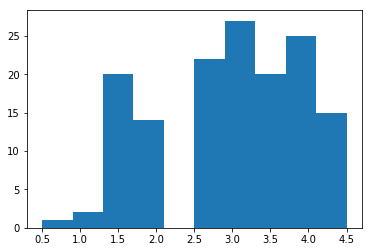

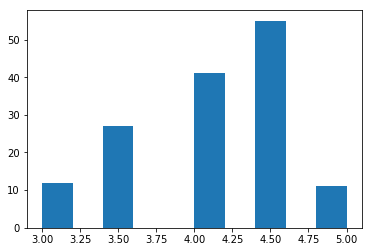

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Metacritic_norm_round"])
plt.show()
plt.hist(movies["Fandango_Stars"])
plt.show()

# Observations
The Fandango scores are all concentrated between 3 and 5. There are no scores lower than 3 in the Fandango reviews and
most of the Fandango scores are around 4 and 4.5.

The Metacritic scores seem to center around 3 and 3.5.

# Calculation of mean, median and standard deviation
We now calculate the mean, median and standad deviation to help quantify these differences in ratings.

In [61]:
import numpy as np  #Import numpy for using np.mean, np.median and np.std
f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
print("The Fandango Stars mean is {}".format(f_mean))
print("The Metacritic mean is {}".format(m_mean))
print("")
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()
print("The Fandango Stars median is {}".format(f_median))
print("The Metacritic median is {}".format(m_median))
print("")
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
print("The Fandango Stars standard deviation is {}".format(f_std))
print("The Metacritic standard deviation is {}".format(m_std))
print("")


The Fandango Stars mean is 4.089041095890411
The Metacritic mean is 2.9726027397260273

The Fandango Stars median is 4.0
The Metacritic median is 3.0

The Fandango Stars standard deviation is 0.5403859779787333
The Metacritic standard deviation is 0.9909605613743364



# Observations
- Fandango is not transparent about how it aggregates its review to form a final rating while Metacritic is transparent about its rating calculation procedure.

- While observing the Metacritic ratings,the median Metacritic score appears higher than the mean because very few "low" reviews drag the median down.

- And while observing the Fandango ratings, the median Fandango score appears lower than the mean because very few "high" reviews drag the median up.

- It is also observed that the Fandango reviews are clustered together thereby accounting for the smaller standard deviation as compared to the Metacritic reviews. So the Fandango ratings in general appear much higher than the Metacritic ones.

# Plotting Scatterplots to find the largest outlier movies

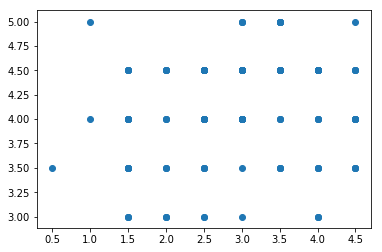

In [62]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [63]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies = movies.sort_values(by = "fm_diff", ascending=False)
movies.head(5) # Printing the 5 movies with the largest difference in rating between Fandango and Metacritic

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


# Correlation 
By calculating the Correlation Coefficient between the two review sites we can determine if Fandango consistently has higher scores than Metacritic or only if a few movies have high scores. We can do this by getting the R Value (Pearson's Coefficient).

In [64]:
from scipy.stats.stats import pearsonr
r_value,p_value = pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
r_value

0.17844919073895918

We can see that the R Value is very low which indicates that there is hardly any correlation between the Fandango
reviews and the Metacritic ones.

# Linear Regression
Let us create a Linear Regression with Metacritic ratings as x-values and Fandango ratings as y-values. This will help
us predict what the Fandango ratings would be for a specific Metacritic rating.

In [65]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

# Finding Residuals (difference between predicted and actual value)

 Using the Linear Regession we created, let us see how the rating points vary on this linear plot.

In [80]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
print(pred_1)
print(pred_5)

3.89708499687
4.28632930877


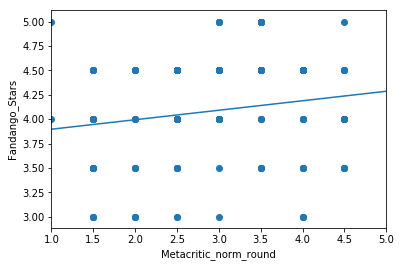

In [81]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim([1, 5])
plt.xlabel("Metacritic_norm_round")
plt.ylabel("Fandango_Stars")
plt.show()

# Conclusion

- The Fandango movie ratings appear to be inflated as compared to the Metacritic ones.
- There is no transparency in the way Fandango rates its movies and almost all ratings lie in the higher range of 3 to 5.